 Import Required Libraries

In [1]:
import cv2
print("OpenCV version:", cv2.__version__)


OpenCV version: 4.11.0


In [2]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import shutil


In [8]:
data_dir = "dataset"  # this is your main folder
img_size = 100  # resizing to 100x100 pixels

images = []
image_paths = []

# Loop through all body part folders
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    
    for file in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(img.flatten())  # flatten into 1D vector
            image_paths.append(img_path)
        except Exception as e:
            print(f"❌ Skipping {file} due to error: {e}")


In [9]:
k = 3  # assuming 3 severity levels: mild, moderate, severe

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(images)


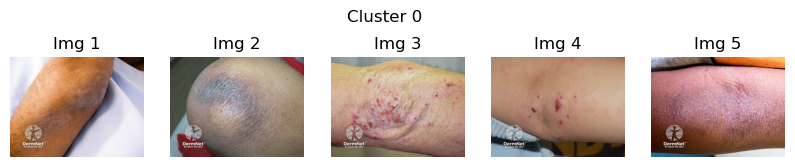

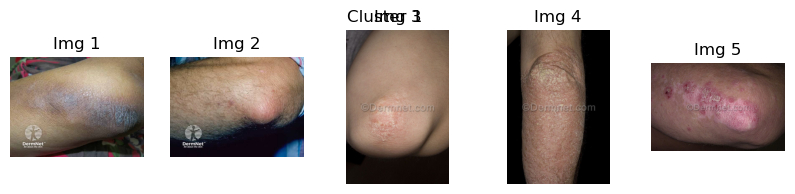

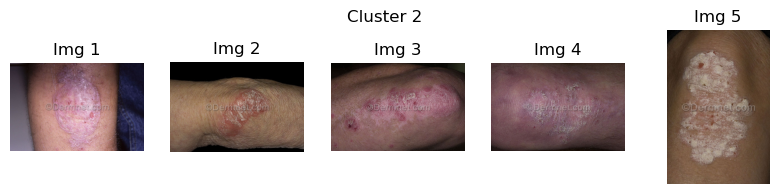

In [10]:
def show_cluster_samples(cluster_id, num=5):
    idxs = [i for i, c in enumerate(clusters) if c == cluster_id]
    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(idxs[:num]):
        img = cv2.imread(image_paths[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.title(f"Img {i+1}")
        plt.axis('off')
    plt.suptitle(f"Cluster {cluster_id}")
    plt.show()

# Show 5 sample images from each cluster
for i in range(k):
    show_cluster_samples(i)


In [11]:
import shutil

output_dir = "clustered_images"
os.makedirs(output_dir, exist_ok=True)

# Create folders: cluster_0, cluster_1, cluster_2
for i in range(k):
    os.makedirs(os.path.join(output_dir, f"cluster_{i}"), exist_ok=True)

# Copy each image into its corresponding cluster folder
for i, img_path in enumerate(image_paths):
    cluster_id = clusters[i]
    file_name = os.path.basename(img_path)
    destination = os.path.join(output_dir, f"cluster_{cluster_id}", file_name)
    shutil.copy(img_path, destination)

print("✅ Images saved into clustered folders.")


✅ Images saved into clustered folders.
